In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [18]:
card_image = cv2.imread(r"E:\twibot\twinit-dataset\small\2.png")

In [31]:
def get_min_max_coord(img):
    min_line = 0
    max_line = img.shape[0]
    min_col = 0
    max_col = img.shape[1]

    lines_to_remove = []
    for i in range(img.shape[0]):
        if img[i, :, :].sum() < 10000:
            lines_to_remove.append(i)

    cols_to_remove = []
    for i in range(img.shape[1]):
        if img[:, i, :].sum() < 10000:
            cols_to_remove.append(i)

    last_id = 0
    for i in range(1, len(lines_to_remove)):
        current_id = lines_to_remove[i]
        if last_id + 1 != current_id:
            min_line = lines_to_remove[i-1]
            max_line = lines_to_remove[i]
            break
        last_id = current_id

    last_id = 0
    for i in range(1, len(cols_to_remove)):
        current_id = cols_to_remove[i]
        if last_id + 1 != current_id:
            min_col = cols_to_remove[i-1]
            max_col = cols_to_remove[i]
            break
        last_id = current_id

    return min_line, max_line, min_col, max_col


In [32]:
min_line, max_line, min_col, max_col = get_min_max_coord(card_image)

new_card_image = card_image[min_line+1:max_line, min_col+1:max_col, :]
new_card_image[:, 0, :].sum()
new_card_image = cv2.resize(new_card_image, dsize=(128, 128))

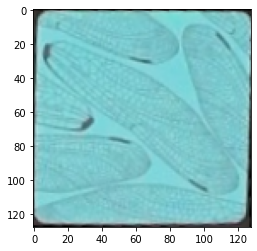

In [33]:
plt.imshow(new_card_image)
plt.show()

In [26]:
hist_all = cv2.calcHist([new_card_image], [0, 1, 2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])

In [28]:
hist_b = cv2.calcHist([new_card_image], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([new_card_image], [1], None, [256], [0, 256])
hist_r = cv2.calcHist([new_card_image], [2], None, [256], [0, 256])

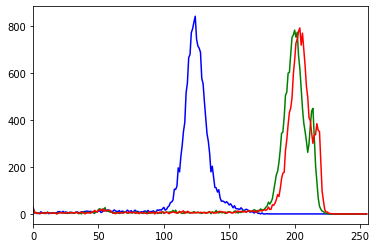

In [30]:
for (h, b) in zip([hist_b, hist_g, hist_r], ("b", "g", "r")):
    h_tmp = h.copy()
    plt.plot(h_tmp, color=b)
    plt.xlim([0, 256])
plt.show()

In [34]:
def print_hist_rgb(path_img):
    card_image = cv2.imread(path_img)
    hist_all = cv2.calcHist([card_image], [0, 1, 2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])

    min_line, max_line, min_col, max_col = get_min_max_coord(card_image)

    new_card_image = card_image[min_line+1:max_line, min_col+1:max_col, :]
    new_card_image[:, 0, :].sum()
    new_card_image = cv2.resize(new_card_image, dsize=(128, 128))

    hist_b = cv2.calcHist([new_card_image], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([new_card_image], [1], None, [256], [0, 256])
    hist_r = cv2.calcHist([new_card_image], [2], None, [256], [0, 256])

    for (h, b) in zip([hist_b, hist_g, hist_r], ("b", "g", "r")):
        plt.plot(h, color=b)
        plt.xlim([0, 256])
    plt.show()

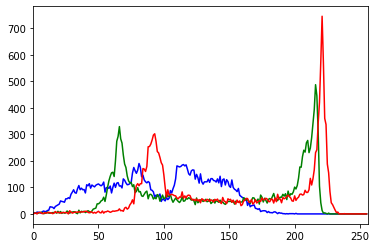

In [35]:
print_hist_rgb(r"E:\twibot\twinit-dataset\small\3.png")

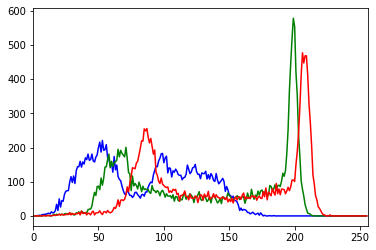

In [36]:
print_hist_rgb(r"E:\twibot\twinit-dataset\small\5.png")

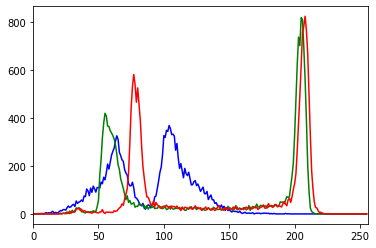

In [37]:
print_hist_rgb(r"E:\twibot\twinit-dataset\small\0.png")

In [40]:
hsv = cv2.cvtColor(card_image, cv2.COLOR_BGR2HSV)

179
0
255
0
237
0


0

In [50]:
def print_hist_hsv(path_img):
    card_image = cv2.cvtColor(cv2.imread(path_img), cv2.COLOR_BGR2HSV)
    hist_all = cv2.calcHist([card_image], [0, 1, 2], None, [180, 256, 256], [0, 180, 0, 256, 0, 256])

    hist_h = cv2.calcHist([card_image], [0], None, [180], [0, 180])
    hist_s = cv2.calcHist([card_image], [1], None, [256], [0, 256])
    hist_v = cv2.calcHist([card_image], [2], None, [256], [0, 256])

    for (i, (h, b)) in enumerate(zip([hist_h, hist_s, hist_v], ("b", "g", "r"))):
        h_tmp = h.copy()
        h_tmp[0] -= hist_all[0, 0, 0]
        plt.plot(h_tmp, color=b)
        plt.xlim([0, 180]) if i == 0 else plt.xlim([0, 256])
    plt.show()

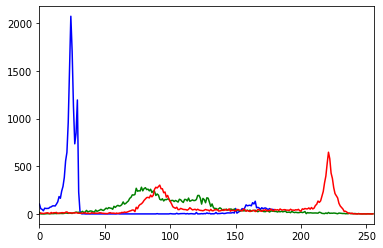

In [51]:
print_hist_hsv(r"E:\twibot\twinit-dataset\small\3.png")

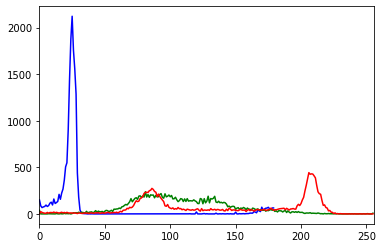

In [52]:
print_hist_hsv(r"E:\twibot\twinit-dataset\small\5.png")

In [73]:
%%time
sample_image = card_image.reshape(card_image.shape[0] * card_image.shape[1], 3)

kmeans = KMeans(n_clusters=5, random_state=0).fit(sample_image)

labels = kmeans.predict(sample_image)

CPU times: total: 359 ms
Wall time: 74 ms


In [68]:
identified_palette = np.array(kmeans.cluster_centers_).astype(int)

In [69]:
recolored_img = np.copy(sample_image)
for index in range(len(recolored_img)):
    recolored_img[index] = identified_palette[labels[index]]

recolored_img = recolored_img.reshape(card_image.shape[0],card_image.shape[1],3)

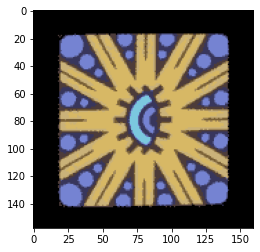

In [70]:
plt.imshow(recolored_img)
plt.show()

In [126]:
base_image = cv2.imread(r"E:\twibot\twinit-dataset\video-2\43.jpg")

In [ ]:
base_image = base_image.reshape(base_image.shape[0] * base_image.shape[1], 3)

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(base_image)

In [146]:
card_image_0 = cv2.imread(r"E:\twibot\twinit-dataset\small\358-0.png")
card_image_1 = cv2.imread(r"E:\twibot\twinit-dataset\small\358-1.png")
card_image_2 = cv2.imread(r"E:\twibot\twinit-dataset\small\329-7.png")

In [147]:
sample_image_0 = card_image_0.reshape(card_image_0.shape[0] * card_image_0.shape[1], 3)
sample_image_1 = card_image_1.reshape(card_image_1.shape[0] * card_image_1.shape[1], 3)
sample_image_2 = card_image_2.reshape(card_image_2.shape[0] * card_image_2.shape[1], 3)

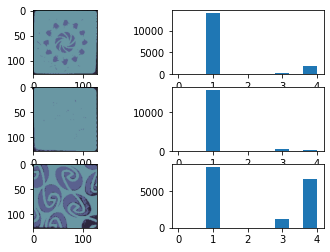

In [148]:
labels_0 = kmeans.predict(sample_image_0)
labels_1 = kmeans.predict(sample_image_1)
labels_2 = kmeans.predict(sample_image_2)

identified_palette = np.array(kmeans.cluster_centers_).astype(int)

recolored_image_0 = np.copy(sample_image_0)
for index in range(len(recolored_image_0)):
    recolored_image_0[index] = identified_palette[labels_0[index]]

recolored_image_1 = np.copy(sample_image_1)
for index in range(len(recolored_image_1)):
    recolored_image_1[index] = identified_palette[labels_1[index]]

recolored_image_2 = np.copy(sample_image_2)
for index in range(len(recolored_image_2)):
    recolored_image_2[index] = identified_palette[labels_2[index]]

recolored_image_0 = recolored_image_0.reshape(card_image_0.shape[0],card_image_0.shape[1],3)
recolored_image_1 = recolored_image_1.reshape(card_image_1.shape[0],card_image_1.shape[1],3)
recolored_image_2 = recolored_image_2.reshape(card_image_2.shape[0],card_image_2.shape[1],3)

fig, ax = plt.subplots(3, 2)
ax[0, 0].imshow(recolored_image_0)
ax[0, 1].hist(labels_0)
ax[1, 0].imshow(recolored_image_1)
ax[1, 1].hist(labels_1)
ax[2, 0].imshow(recolored_image_2)
ax[2, 1].hist(labels_2)

plt.show()

In [4]:
def print_hist_gray(path_img):
    card_image = cv2.cvtColor(cv2.imread(path_img), cv2.COLOR_BGR2GRAY)
    hist = cv2.calcHist([card_image], [0], None, [256], [0, 256])

    hist[0] = 0
    plt.plot(hist, color="gray")
    plt.xlim([0, 256])
    plt.show()

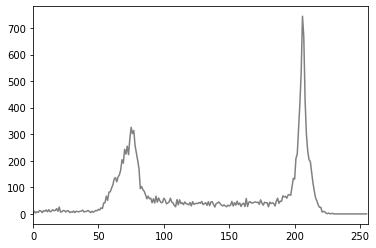

In [10]:
print_hist_gray(r"E:\twibot\twinit-dataset\small\3.png")

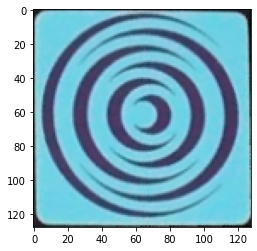

In [129]:
plt.imshow(card_image_1)

In [140]:
rotate_90 = cv2.rotate(recolored_image_1, cv2.ROTATE_90_CLOCKWISE)
rotate_180 = cv2.rotate(rotate_90, cv2.ROTATE_90_CLOCKWISE)
rotate_270 = cv2.rotate(rotate_180, cv2.ROTATE_90_CLOCKWISE)

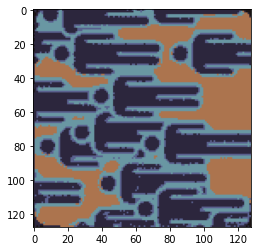

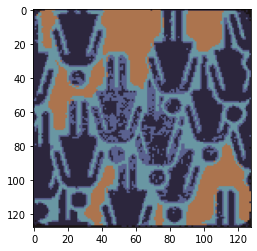

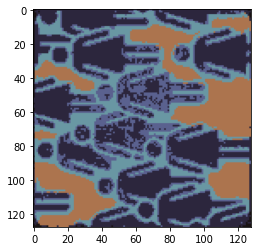

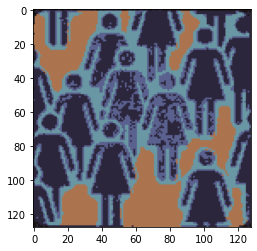

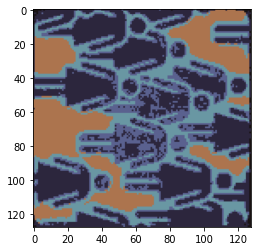

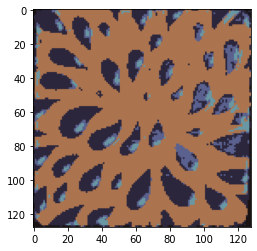

In [144]:
plt.imshow(recolored_image_0)
plt.show()
plt.imshow(recolored_image_1)
plt.show()
plt.imshow(rotate_90)
plt.show()
plt.imshow(rotate_180)
plt.show()
plt.imshow(rotate_270)
plt.show()
plt.imshow(recolored_image_2)
plt.show()

In [145]:
for a in [recolored_image_1, rotate_90, rotate_180, rotate_270]:
    print(((recolored_image_2 - a)**2).mean())

80.33723958333333
79.57303873697917
81.88126627604167
80.23274739583333


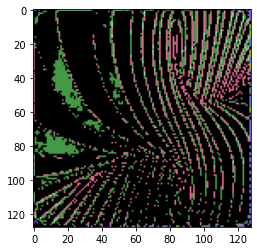

In [106]:
plt.imshow((recolored_image_1 - rotate_180)**2)

In [3]:
ref_image = cv2.imread(r"E:\twibot\twinit-dataset\twinit-ref.jpg")
ref_image = cv2.cvtColor(ref_image, cv2.COLOR_BGR2RGB)
white_pixels = np.where(
    (ref_image[..., 0] == 255) &
    (ref_image[..., 1] == 255) &
    (ref_image[..., 2] == 255)
)
ref_image[white_pixels] = [0, 0, 0]
ref_image = cv2.cvtColor(ref_image, cv2.COLOR_RGB2BGR)
cv2.imwrite(r"E:\twibot\twinit-dataset\twinit-ref_black.jpg", ref_image)

True